In [82]:
from copy import deepcopy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (18, 9)
plt.style.use('ggplot')

In [83]:
data = pd.read_csv('dataset/xclara.csv')
data.head(10)

,V1,V2
0,2.072345,-3.241693
1,17.936710,15.784810
2,1.083576,7.319176
3,11.120670,14.406780
4,23.711550,2.557729
5,24.169930,32.024780
6,21.665780,4.892855
7,4.693684,12.342170
8,19.211910,-1.121366
9,4.230391,-4.441536


In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 2 columns):
V1    3000 non-null float64
V2    3000 non-null float64
dtypes: float64(2)
memory usage: 47.0 KB


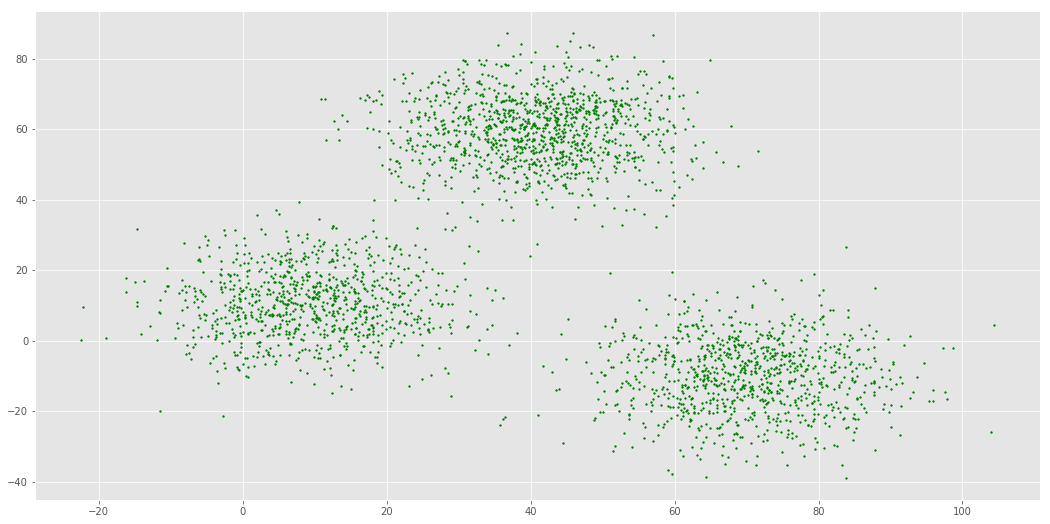

In [85]:
a1 = data['V1'].values
a2 = data['V2'].values
X = np.array(list(zip(a1, a2)))
plt.scatter(a1, a2, c='green', s=3)

In [86]:
# Number of clusters
k = 3

## Randomly choosing 'k' initial centroid points

In [87]:
# X coordinates of random centroids
C_x = np.random.randint(0, np.max(X), size=k)
# Y coordinates of random centroids
C_y = np.random.randint(0, np.max(X), size=k)
C = np.array(list(zip(C_x, C_y)), dtype=np.float32)
print("Initial Centroids")
print(C)

Initial Centroids
[[32. 79.]
 [81. 88.]
 [51. 23.]]


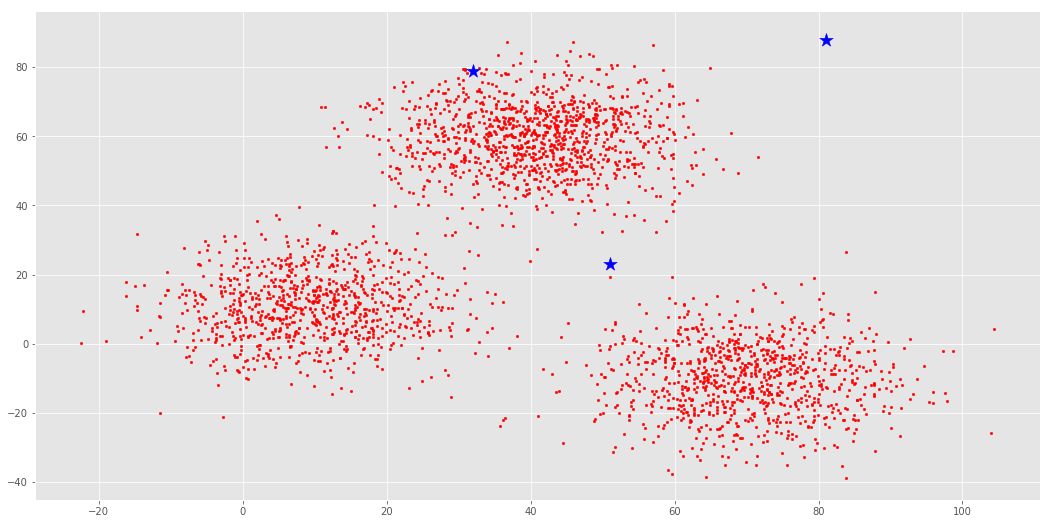

In [88]:
plt.scatter(a1, a2, c='red', s=6)
plt.scatter(C_x, C_y, marker='*', s=200, c='b')

In [89]:
# To store the value of centroids when it updates
C_old = np.zeros(C.shape)
# Cluster Lables(0, 1, 2)
clusters = np.zeros(len(X))

## Using  Euclidean formula for distance calculations

In [90]:
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

In [91]:
# Error func. - Distance between new centroids and old centroids
error = dist(C, C_old, None)

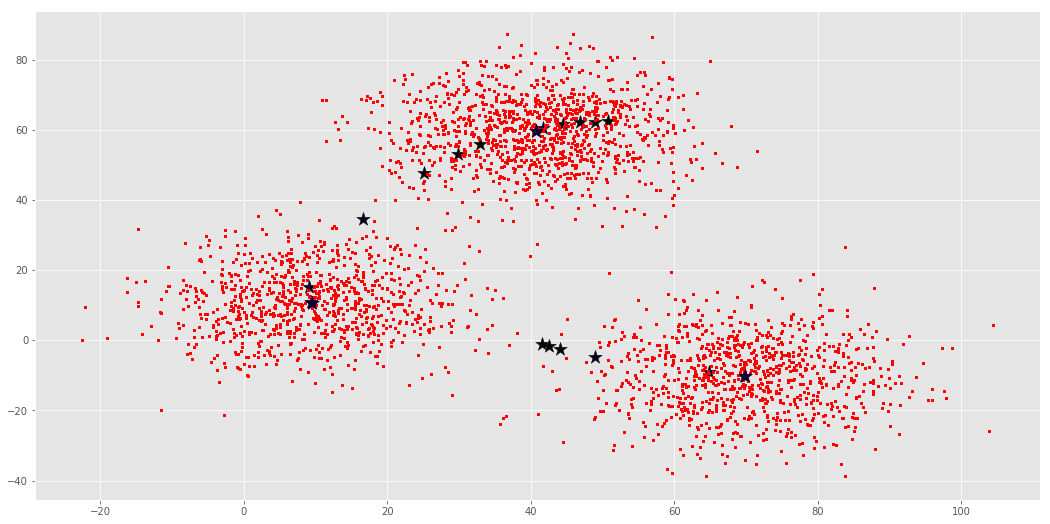

In [94]:
# Running the loop till the error becomes zero
l = 500
while error != 0:
# Assigning each value to its closest cluster
    for i in range(len(X)):
        distances = dist(X[i], C)
        cluster = np.argmin(distances)
        clusters[i] = cluster
    # Storing the old centroid values
    C_old = deepcopy(C)
    # Finding the new centroids by taking the average value
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        C[i] = np.mean(points, axis=0)
    error = dist(C, C_old, None)
    C_x = [C[j][0] for j in range(k)]
    C_y = [C[j][1] for j in range(k)]
    plt.scatter(a1, a2, c='red', s=6)
    cl = '#050' + str(l)
    plt.scatter(C_x, C_y, marker='*', s=200, c=cl)
    l = l + 5

## Visualizing the final clusters

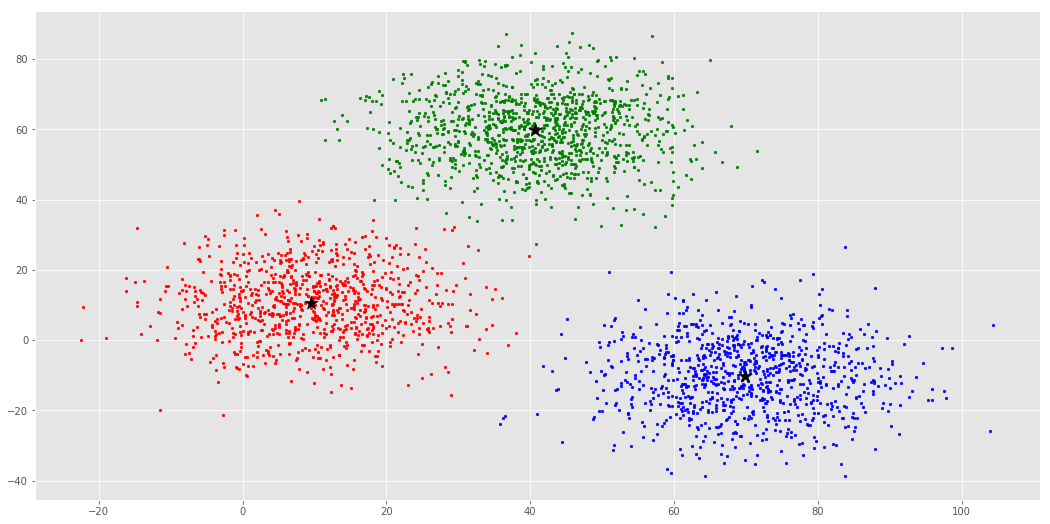

In [95]:
colors = ['r', 'g', 'b']
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='black')
